<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/week9_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 강의 9주차

## Simple Linear Regression with Neural Networks

### 데이터셋 만들기

In [157]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


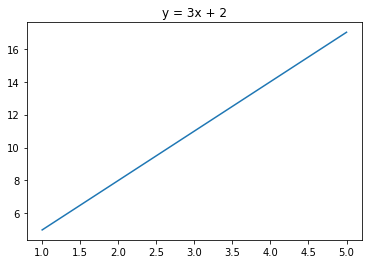

In [158]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 모델구조

In [159]:
import tensorflow as tf

In [160]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [161]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [162]:
import tensorflow as tf

In [163]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

### 선형회귀모형 생성

In [164]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

In [165]:
# 모델 요약
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


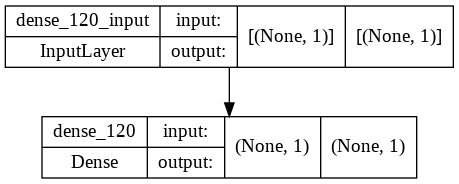

In [166]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [167]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [168]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])



In [169]:

# 훈련
history = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 273ms/step - loss: 39.4911 - mae: 5.9953
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 23.1850 - mae: 4.6364
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.6814 - mae: 3.5989
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1420 - mae: 2.8067
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 4.9128 - mae: 2.2017
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0298 - mae: 1.7396
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.9314 - mae: 1.3867
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2902 - mae: 1.1171
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9154 - mae: 0.9111
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6959 - mae: 0.7537
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

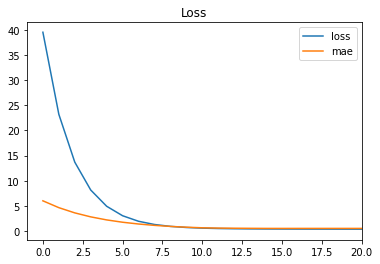

In [170]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [171]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 94ms/step - loss: 0.2122 - mae: 0.3954


[0.21218478679656982, 0.3953733444213867]

In [172]:
# 예측
model.predict([10])

# 3 * 10 + 2 = 32

array([[33.910885]], dtype=float32)

## mnist classification with Neural Networks

### 데이터셋 만들기

In [173]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [174]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [175]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


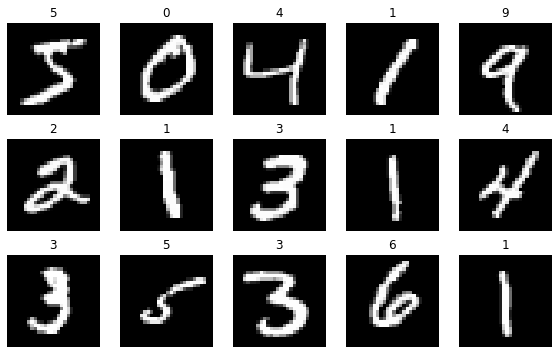

In [176]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 데이터 전처리

In [177]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [178]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [179]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [180]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

### Input 의 2가지 방법

In [181]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [182]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 모델 설계

#### 출력 층이 1개 node 인 경우

In [183]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(1, activation='sigmoid'), 
])

In [184]:

# tf.keras.layers.Dense(1, activation='sigmoid')

# # 출력층 노드 = 2개 이상인 경우, softmax
# tf.keras.layers.Dense(10, activation='softmax')

In [185]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

#### 출력 층이 10개 node인 경우

In [186]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [187]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# # y가 원 핫 벡터가 아닌경우
# # [5]
# model.compile(loss='sparse_categorical_crossentropy')

In [220]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_151 (Dense)           (None, 256)               200960    
                                                                 
 dense_152 (Dense)           (None, 64)                16448     
                                                                 
 dense_153 (Dense)           (None, 32)                2080      
                                                                 
 dense_154 (Dense)           (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


#### 옵티마이져

In [188]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
# model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### 평가 지표

In [189]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

### 훈련

In [190]:
# 훈련
model.fit(x_train, y_train, 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2247 - sparse_categorical_accuracy: 0.9330
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0949 - sparse_categorical_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - sparse_categorical_accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9919
Epoch 9/10
1875/1875 [==========

### 테스트

In [191]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9793
검증셋 정확도: 0.9793000221252441


### 예측

In [192]:
# 예측
predictions = model.predict(x_test)

In [193]:
# 예측 결과 출력
predictions[0]

array([7.1907634e-15, 8.6511859e-10, 1.5991154e-10, 5.1412919e-11,
       2.0259003e-12, 6.8124048e-11, 2.8545766e-15, 1.0000000e+00,
       1.4098702e-16, 9.6074393e-10], dtype=float32)

In [194]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

7


In [195]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


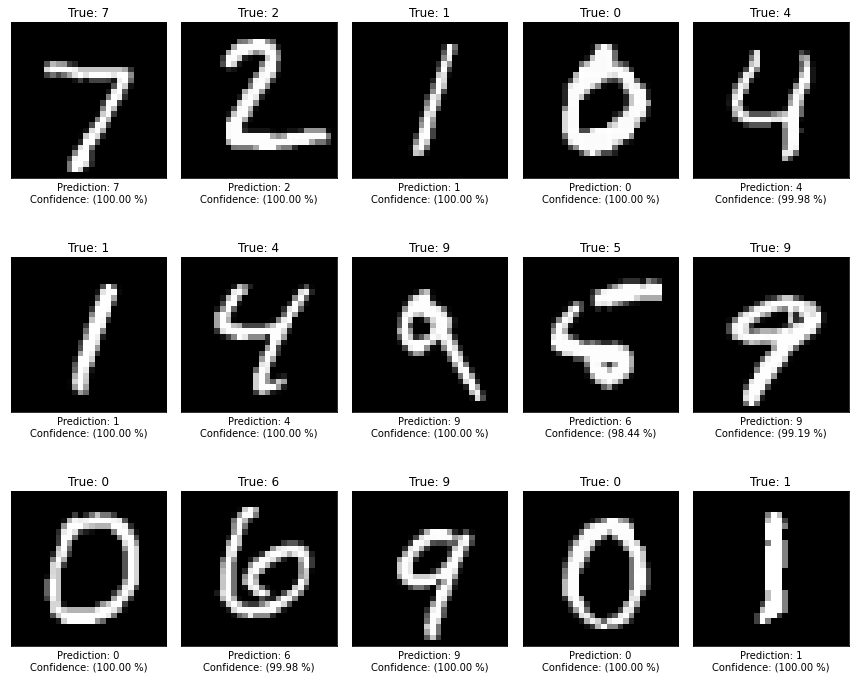

In [196]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

## Deep Learning Optimization Techniques

In [197]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#### weight initialization

In [198]:

dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [199]:

# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

#### Regularization

In [200]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_131',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [201]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


In [202]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l2(l2=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L2', 'config': {'l2': 0.10000000149011612}}


### batch normalization

In [203]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_134 (Dense)           (None, 64)                50240     
                                                                 
 dense_135 (Dense)           (None, 32)                2080      
                                                                 
 dense_136 (Dense)           (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [204]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_137 (Dense)           (None, 64)                50240     
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_138 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                     

### Activation Functions

In [205]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [206]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_140 (Dense)           (None, 64)                50240     
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64)                0         
                                                                 
 dense_141 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                    

### 비교

In [207]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [208]:
# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.9173 - val_loss: 0.1467 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1322 - accuracy: 0.9605 - val_loss: 0.1405 - val_accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0980 - accuracy: 0.9701 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.0923 - val_accuracy: 0.9704
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0982 - val_accuracy: 0.9703
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.0918 - val_accuracy:

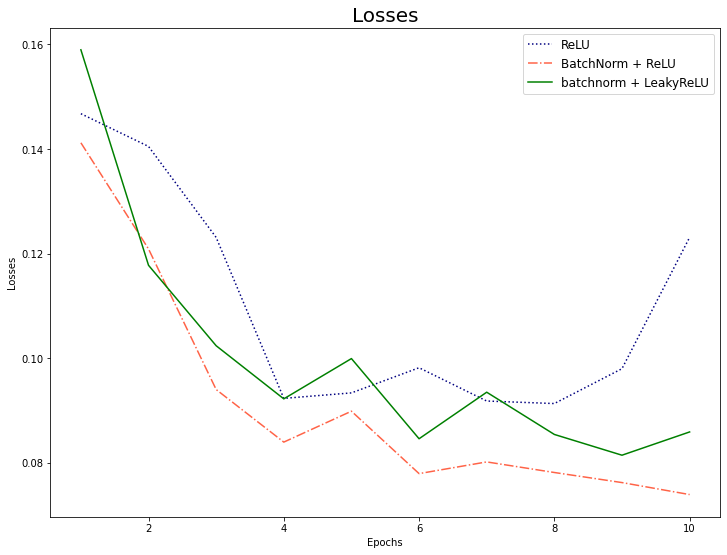

In [209]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

### Early Stopping

In [210]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [211]:
# EarlyStopping 콜백 생성
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [212]:
hist = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, 
          callbacks=[earlystopping]
          )

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2256 - accuracy: 0.9325 - val_loss: 0.1135 - val_accuracy: 0.9666
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0930 - accuracy: 0.9718 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0833 - val_accuracy: 0.9745
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.0894 - val_accuracy: 0.9770
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0927 - val_accuracy:

In [213]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [214]:
hist2 = model2.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50
          )

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2319 - accuracy: 0.9308 - val_loss: 0.1002 - val_accuracy: 0.9700
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.0941 - val_accuracy: 0.9706
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0798 - val_accuracy: 0.9764
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0910 - val_accuracy: 0.9715
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0818 - val_accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0787 - val_accuracy: 0.9779
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0720 - val_accuracy:

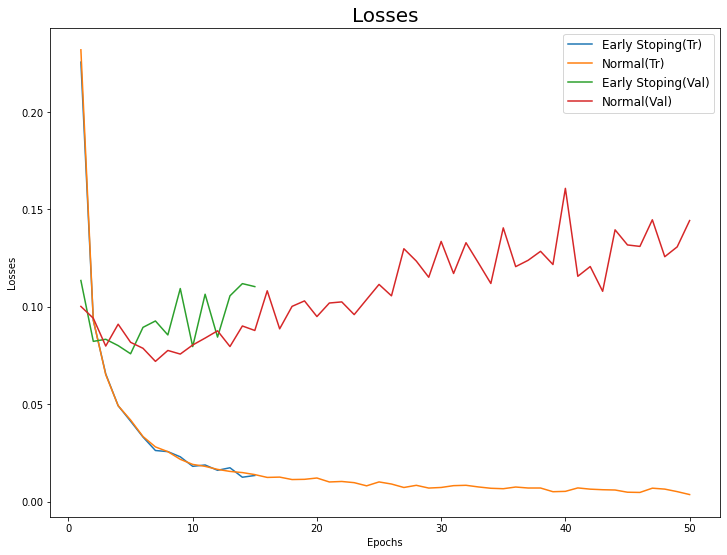

In [215]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['loss'])
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['val_loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['val_loss'])

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['Early Stoping(Tr)', 'Normal(Tr)', 'Early Stoping(Val)', 'Normal(Val)'], fontsize=12)
plt.show()

### Learning Rate Scheduler

In [216]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

In [217]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [218]:
model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 초기 학습률 확인(0.01)
print(round(model.optimizer.lr.numpy(), 5))

0.01


In [219]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10,
          # 학습률 스케줄러 적용
          callbacks=[lr_scheduler]
          )
# 최종 학습률 스케줄러 확인
round(model.optimizer.lr.numpy(), 5)

learning_rate: 0.01000
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6580 - accuracy: 0.8186 - val_loss: 0.2900 - val_accuracy: 0.9158 - lr: 0.0100
learning_rate: 0.01000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2636 - accuracy: 0.9240 - val_loss: 0.2245 - val_accuracy: 0.9366 - lr: 0.0100
learning_rate: 0.01000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2047 - accuracy: 0.9398 - val_loss: 0.1733 - val_accuracy: 0.9473 - lr: 0.0100
learning_rate: 0.01000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1675 - accuracy: 0.9510 - val_loss: 0.1465 - val_accuracy: 0.9557 - lr: 0.0100
learning_rate: 0.01000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9586 - val_loss: 0.1290 - val_accuracy: 0.9616 - lr: 0.0100
learning_rate: 0.01000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0

0.00607